In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('dataset//Internet-Demographic.csv')

 # 1. Distribution of Birth Rates

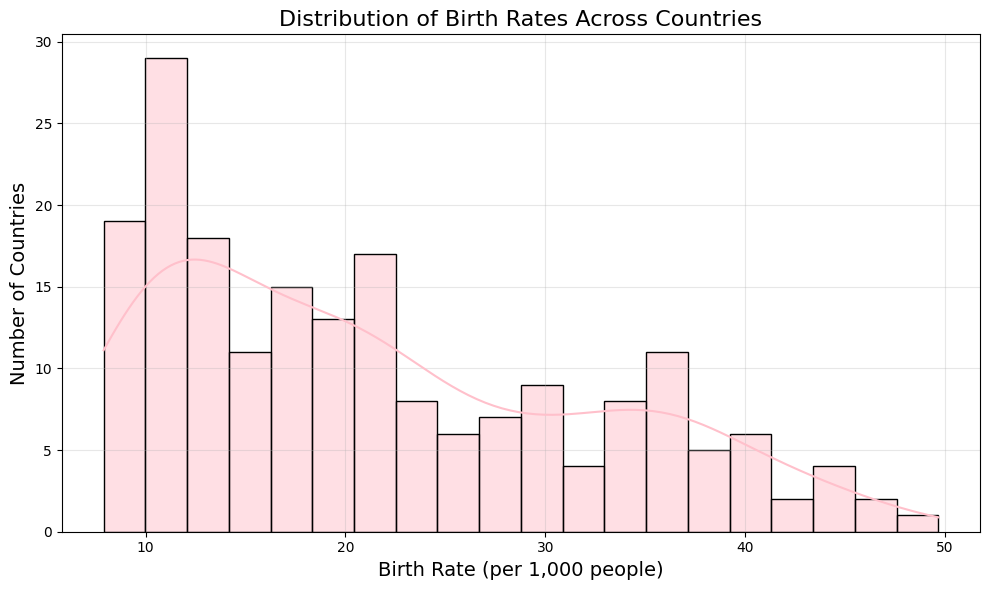

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Birth rate'], bins=20, kde=True, color='pink')
plt.title('Distribution of Birth Rates Across Countries', fontsize=16)
plt.xlabel('Birth Rate (per 1,000 people)', fontsize=14)
plt.ylabel('Number of Countries', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2. Top 5 Countries with the Highest Internet Usage

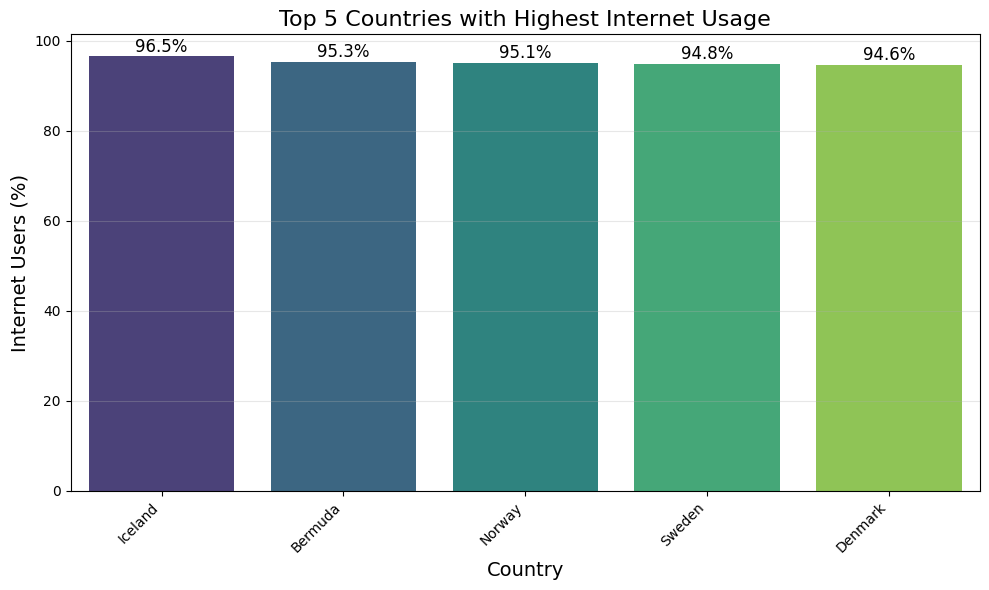

In [14]:
top_internet = df.sort_values('Internet users', ascending=False).head(5)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Country Name', y='Internet users', data=top_internet, palette='viridis')
plt.title('Top 5 Countries with Highest Internet Usage', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Internet Users (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

for i, v in enumerate(top_internet['Internet users']):
    ax.text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# 3. Count of Countries by Income Group

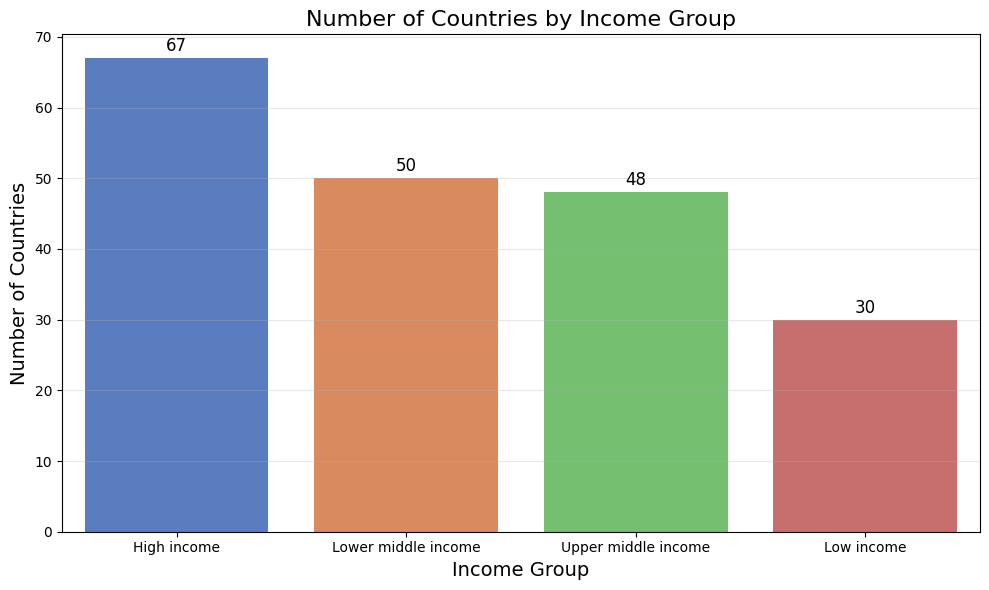

In [15]:
income_counts = df['Income Group'].value_counts().reset_index()
income_counts.columns = ['Income Group', 'Count']

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Income Group', y='Count', data=income_counts, palette='muted')
plt.title('Number of Countries by Income Group', fontsize=16)
plt.xlabel('Income Group', fontsize=14)
plt.ylabel('Number of Countries', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')

for i, v in enumerate(income_counts['Count']):
    ax.text(i, v + 1, str(v), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# 4. Box Plot of Internet Usage

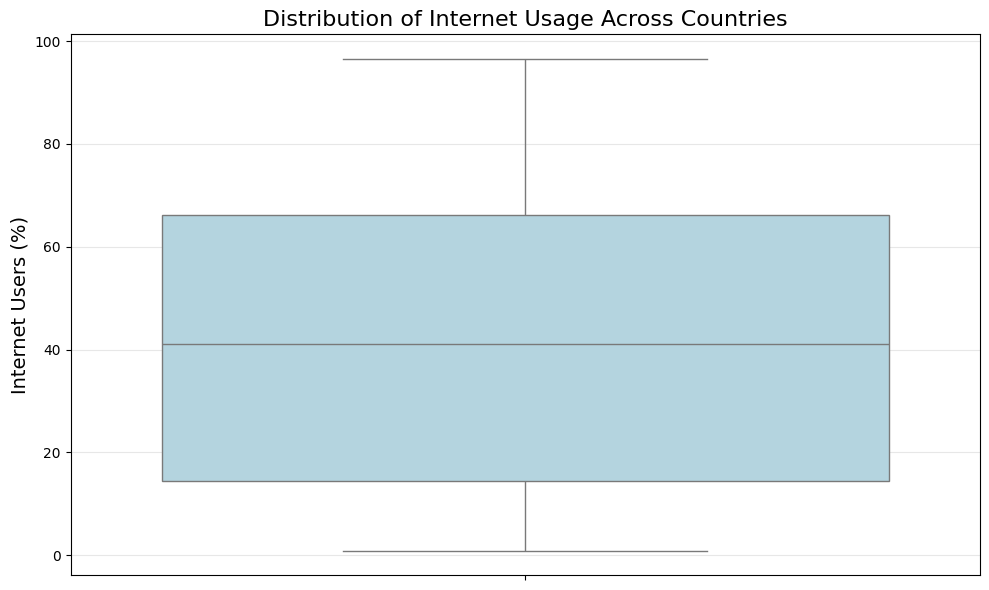

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Internet users'], color='lightblue')
plt.title('Distribution of Internet Usage Across Countries', fontsize=16)
plt.ylabel('Internet Users (%)', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# 5. Countries with No Internet Access

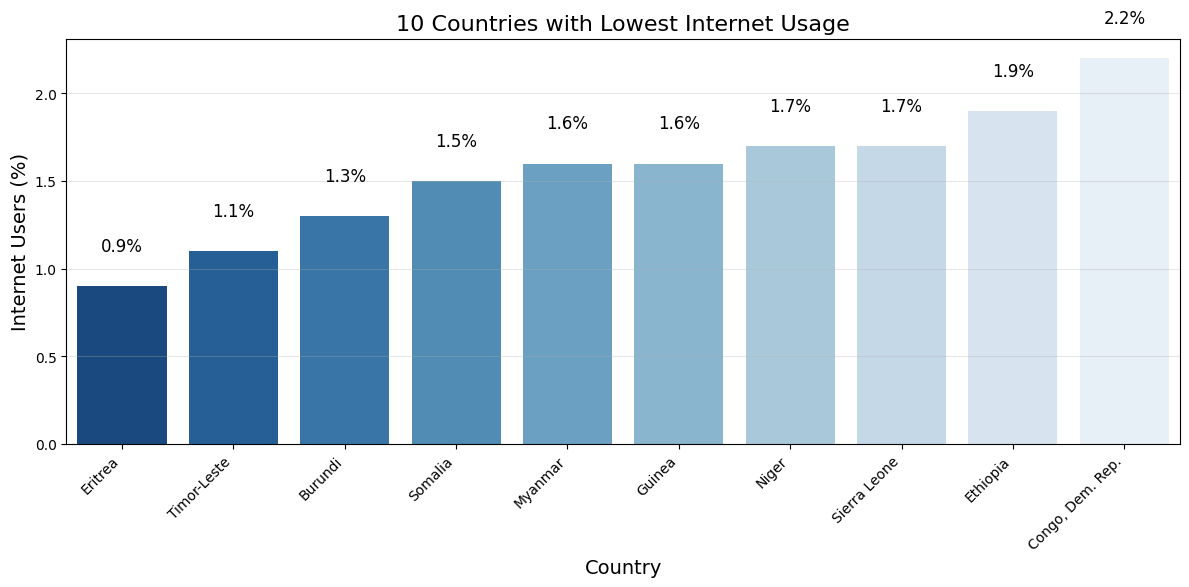

In [17]:
low_internet = df.sort_values('Internet users').head(10)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Country Name', y='Internet users', data=low_internet, palette='Blues_r')
plt.title('10 Countries with Lowest Internet Usage', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Internet Users (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

for i, v in enumerate(low_internet['Internet users']):
    ax.text(i, v + 0.2, f"{v:.1f}%", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# 6. Average Birth Rate

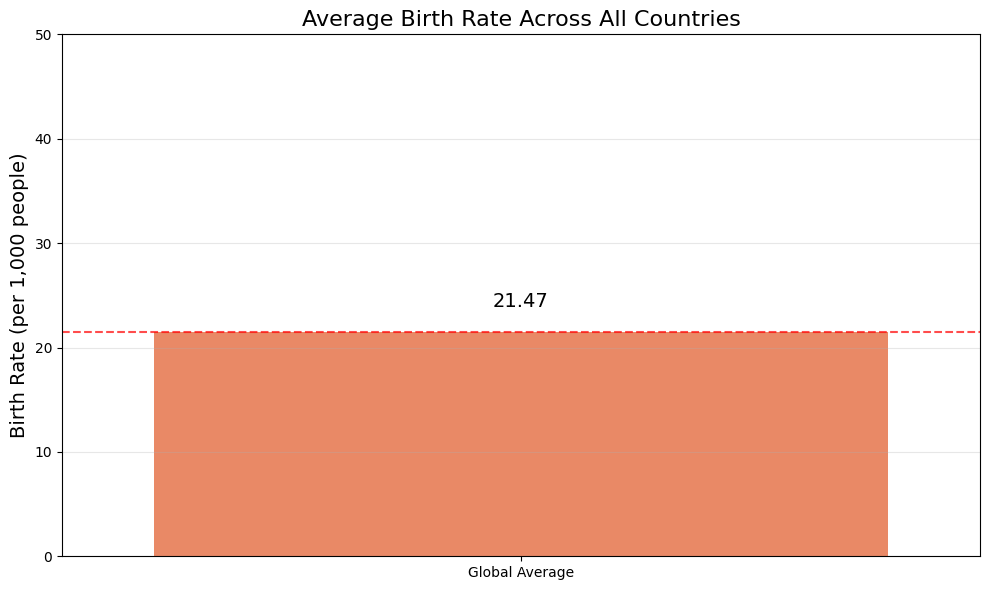

In [18]:
avg_birth_rate = df['Birth rate'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=['Global Average'], y=[avg_birth_rate], palette=['coral'])
plt.axhline(y=avg_birth_rate, color='r', linestyle='--', alpha=0.7)
plt.title('Average Birth Rate Across All Countries', fontsize=16)
plt.xlabel('', fontsize=14)
plt.ylabel('Birth Rate (per 1,000 people)', fontsize=14)
plt.ylim(0, 50)
plt.annotate(f'{avg_birth_rate:.2f}', xy=(0, avg_birth_rate), xytext=(0, avg_birth_rate+2), 
             ha='center', va='bottom', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

# 7. Scatter Plot: Birth Rate vs Internet Usage

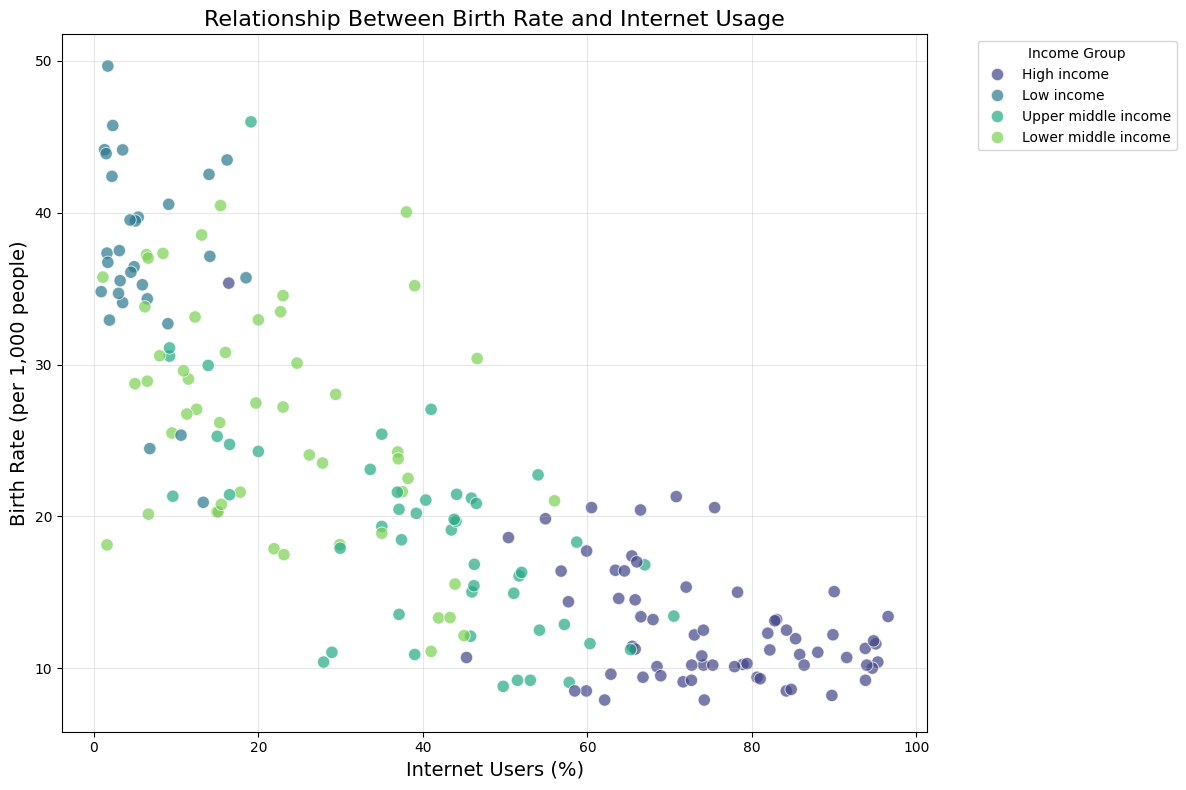

In [19]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Internet users', y='Birth rate', data=df, hue='Income Group', palette='viridis', s=80, alpha=0.7)
plt.title('Relationship Between Birth Rate and Internet Usage', fontsize=16)
plt.xlabel('Internet Users (%)', fontsize=14)
plt.ylabel('Birth Rate (per 1,000 people)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend(title='Income Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()// mnn

# 8. Countries with Birth Rates Above 40

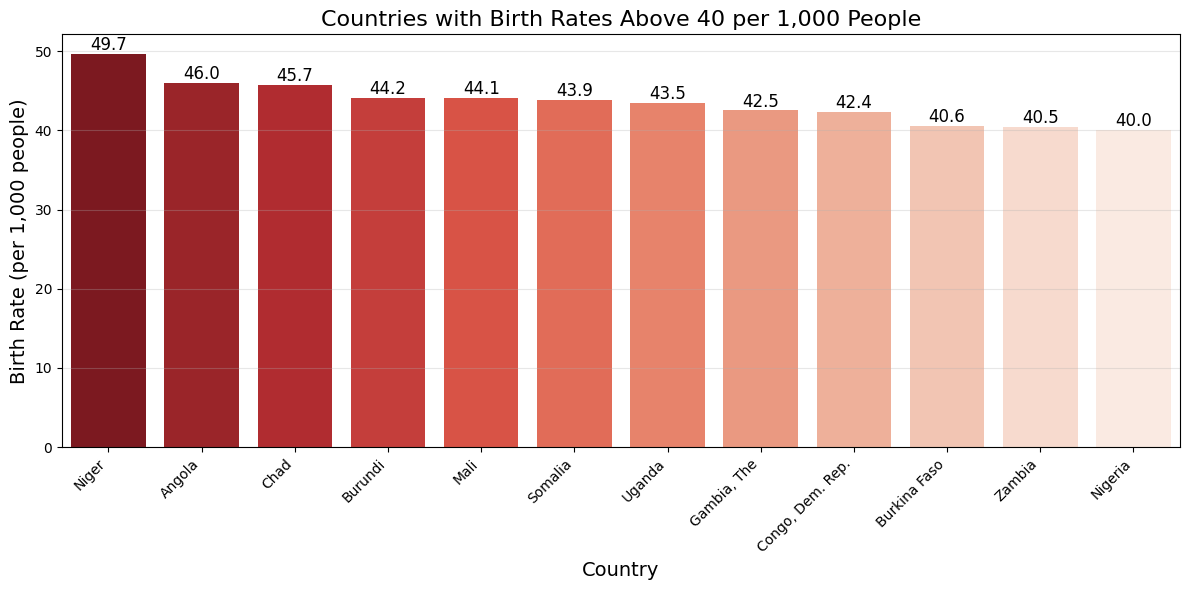

In [20]:
high_birth_rate = df[df['Birth rate'] > 40].sort_values('Birth rate', ascending=False)
plt.figure(figsize=(12, 6))
ax = sns.barplot(x='Country Name', y='Birth rate', data=high_birth_rate, palette='Reds_r')
plt.title('Countries with Birth Rates Above 40 per 1,000 People', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Birth Rate (per 1,000 people)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')

for i, v in enumerate(high_birth_rate['Birth rate']):
    ax.text(i, v + 0.5, f"{v:.1f}", ha='center', fontsize=12)

plt.tight_layout()
plt.show()

# 9. Pie Chart of Income Groups

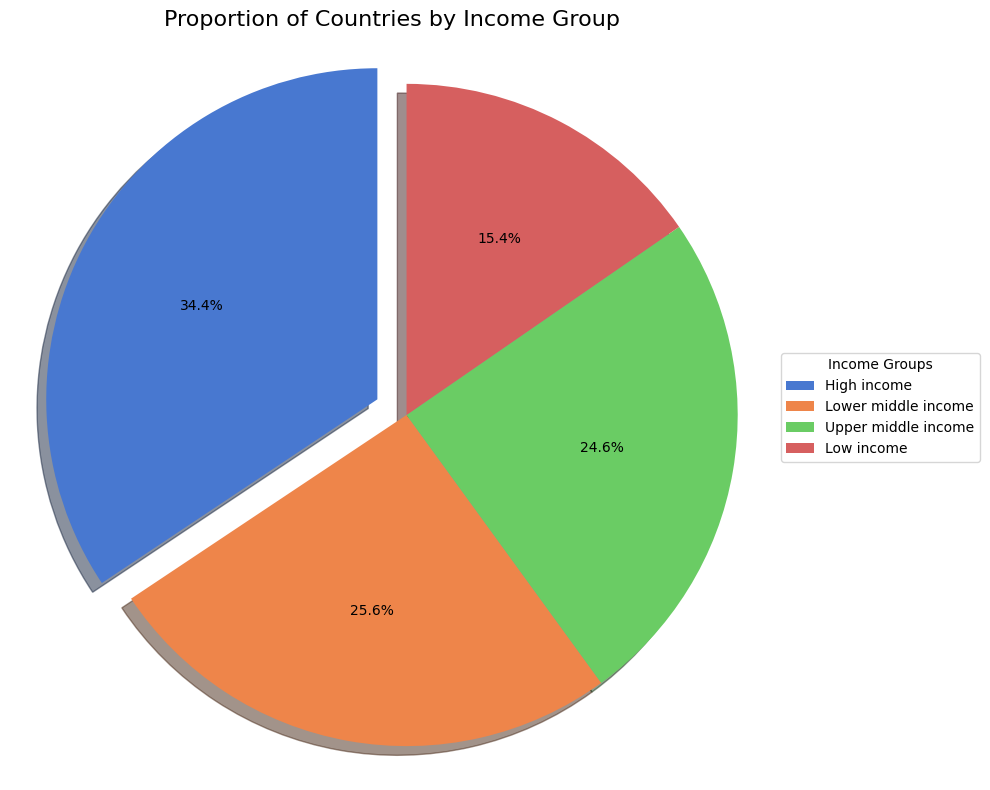

In [21]:
plt.figure(figsize=(10, 8))
income_counts_pie = df['Income Group'].value_counts()
explode = (0.1, 0, 0, 0) if len(income_counts_pie) == 4 else (0,) * len(income_counts_pie)
plt.pie(income_counts_pie, labels=None, autopct='%1.1f%%', startangle=90, 
        colors=sns.color_palette('muted'), explode=explode, shadow=True)
plt.axis('equal')
plt.title('Proportion of Countries by Income Group', fontsize=16)
plt.legend(income_counts_pie.index, title='Income Groups', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()

# 10. Correlation Between Birth Rate and Internet Usage

In [ ]:
correlation = df['Birth rate'].corr(df['Internet users'])

corr_data = pd.DataFrame([[1.0, correlation], [correlation, 1.0]], 
                         columns=['Birth Rate', 'Internet Usage'],
                         index=['Birth Rate', 'Internet Usage'])

plt.figure(figsize=(8, 6))
sns.heatmap(corr_data, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0,
            linewidths=.5, cbar_kws={'label': 'Correlation Coefficient'})
plt.title('Correlation Between Birth Rate and Internet Usage', fontsize=16)
plt.tight_layout()
plt.savefig('birth_internet_correlation.png')
plt.show()